In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import re
import pandas as pd 
import glob
import scipy
import scipy.io
from collections import Counter
import scanpy as sc
import gseapy as gp
import h5py
import louvain
import harmonypy as hm
import scrublet as scr
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,12
file_figs = ''
from methods import *
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.settings.figdir = '../figures/ec_subtypes/'

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 8.0.0
anndata             0.7.4
appdirs             1.4.4
backcall            0.2.0
bioservices         1.7.9
brotli              NA
bs4                 4.9.1
cairo               1.19.1
certifi             2020.12.05
cffi                1.14.0
chardet             3.0.4
colorama            0.4.3
colorlog            NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.10.1
get_version         2.1
google              NA
gseapy              0.10.1
h5py                2.10.0
harmonypy           NA
html5lib            1.1
idna                2.10
igraph              0.8.2
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
joblib              0.16.0
kiwisolver          1.2.0
legacy_api_wrap     1.2
leidenalg           0.8.2
llvmlite            0.34.0
louvain

-----
anndata     0.7.4
scanpy      1.6.0
sinfo       0.3.1
-----
PIL                 8.0.0
anndata             0.7.4
appdirs             1.4.4
attr                20.3.0
backcall            0.2.0
bioservices         1.7.9
brotli              NA
bs4                 4.9.1
cairo               1.19.1
certifi             2020.12.05
cffi                1.14.0
chardet             3.0.4
colorama            0.4.3
colorlog            NA
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.10.1
get_version         2.1
google              NA
gseapy              0.10.1
h5py                2.10.0
harmonypy           NA
html5lib            1.1
idna                2.10
igraph              0.8.2
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.2
jinja2              2.11.2
joblib              0.16.0
jsonschema          3.2.0
kiwisolver          1.2.0
lega

/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


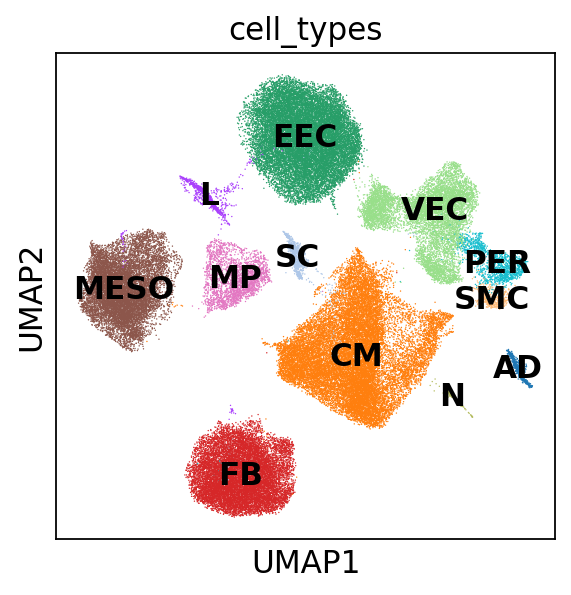

In [2]:
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,12
file_figs = ''
from methods import *
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)
sc.settings.figdir = '../figures/M2_cell_type/'

adata = sc.read_h5ad("../h5ad/celltypes_60_6000_500_0.1.h5ad")
print(adata)
sc.pl.umap(adata, color = 'cell_types', legend_loc = 'on data')

In [3]:
sc.tl.rank_genes_groups(adata, 'cell_types', method='wilcoxon', n_genes = 1000)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:25)


    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns["dendrogram_['cell_types']"]`
categories: AD, CM, EEC, etc.
var_group_labels: SC


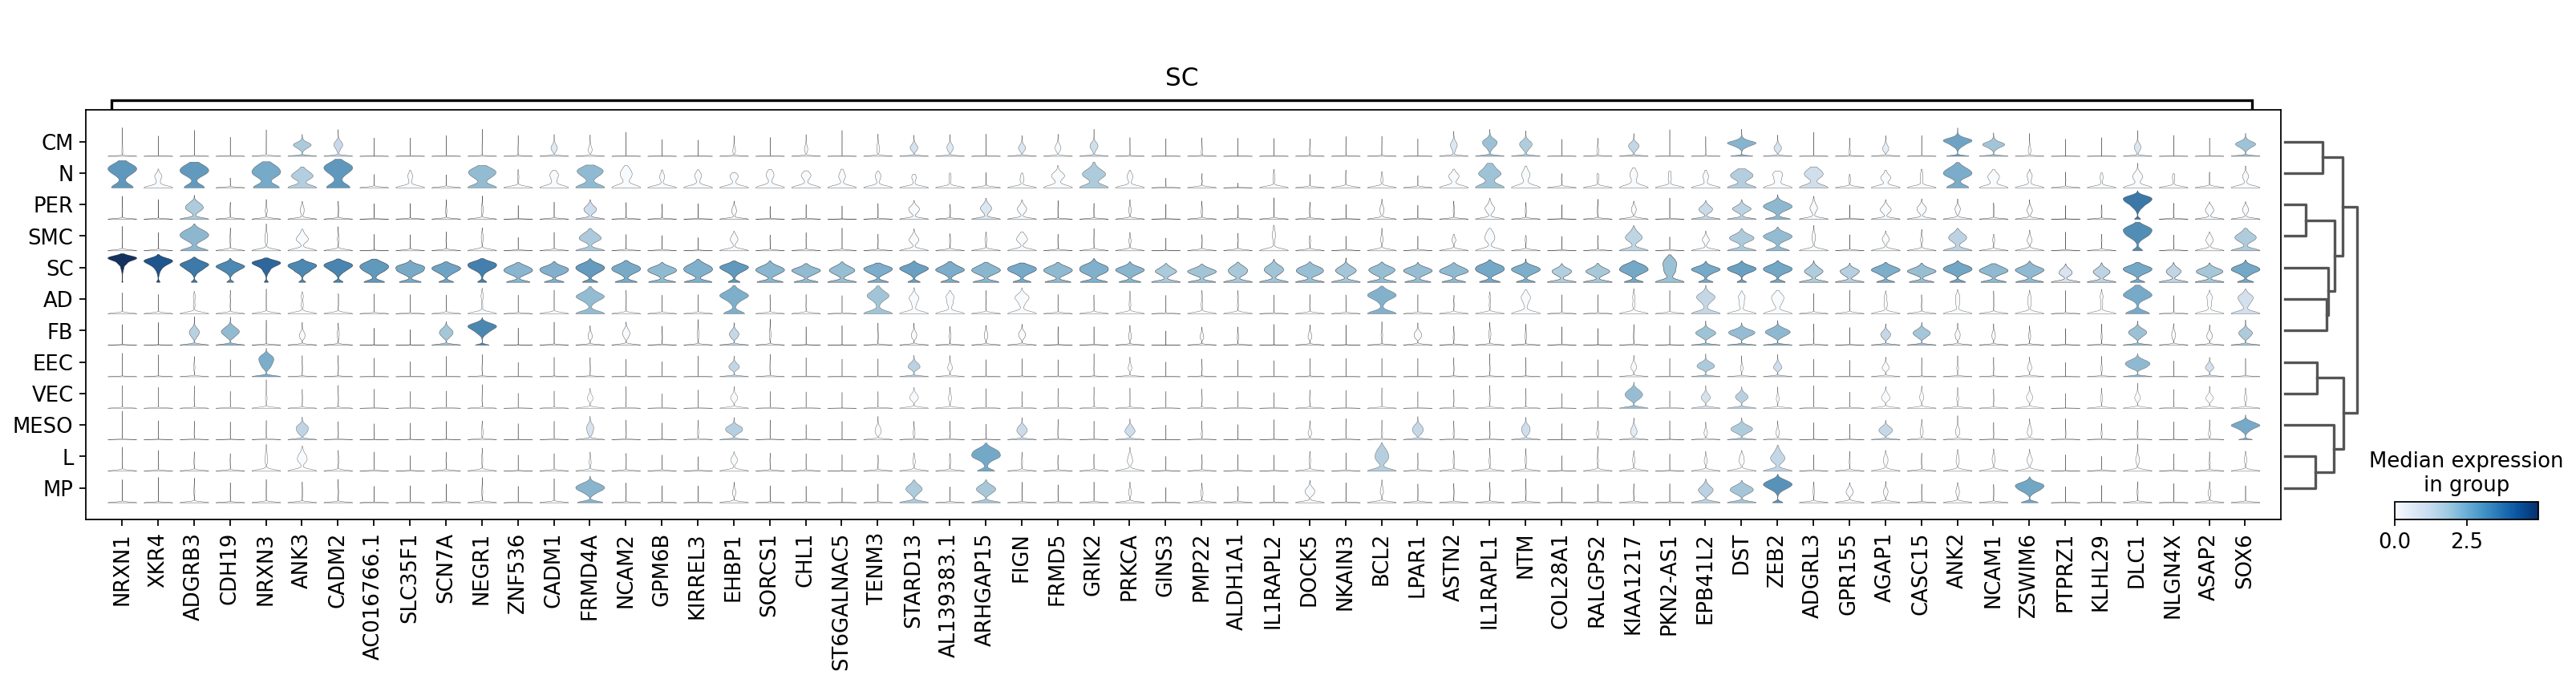

In [4]:
sc.pl.rank_genes_groups_stacked_violin(adata, groupby = "cell_types", n_genes = 60, groups = ["SC"], dendrogram = True)

/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


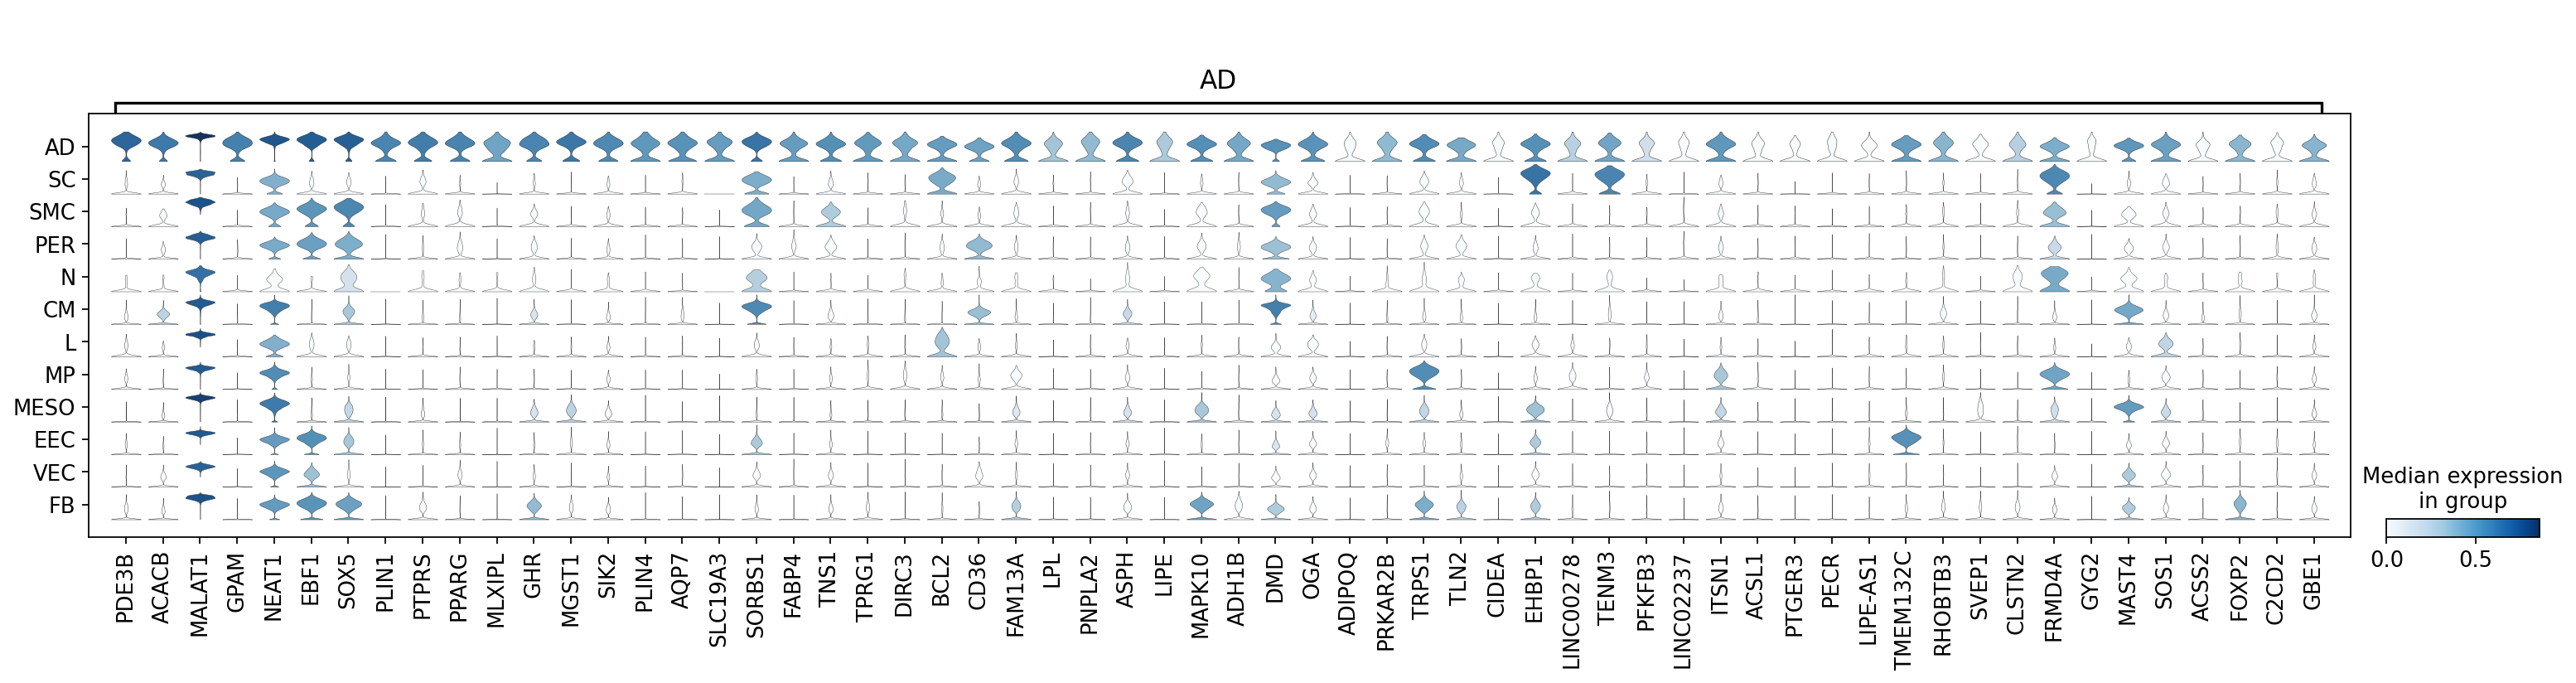

/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


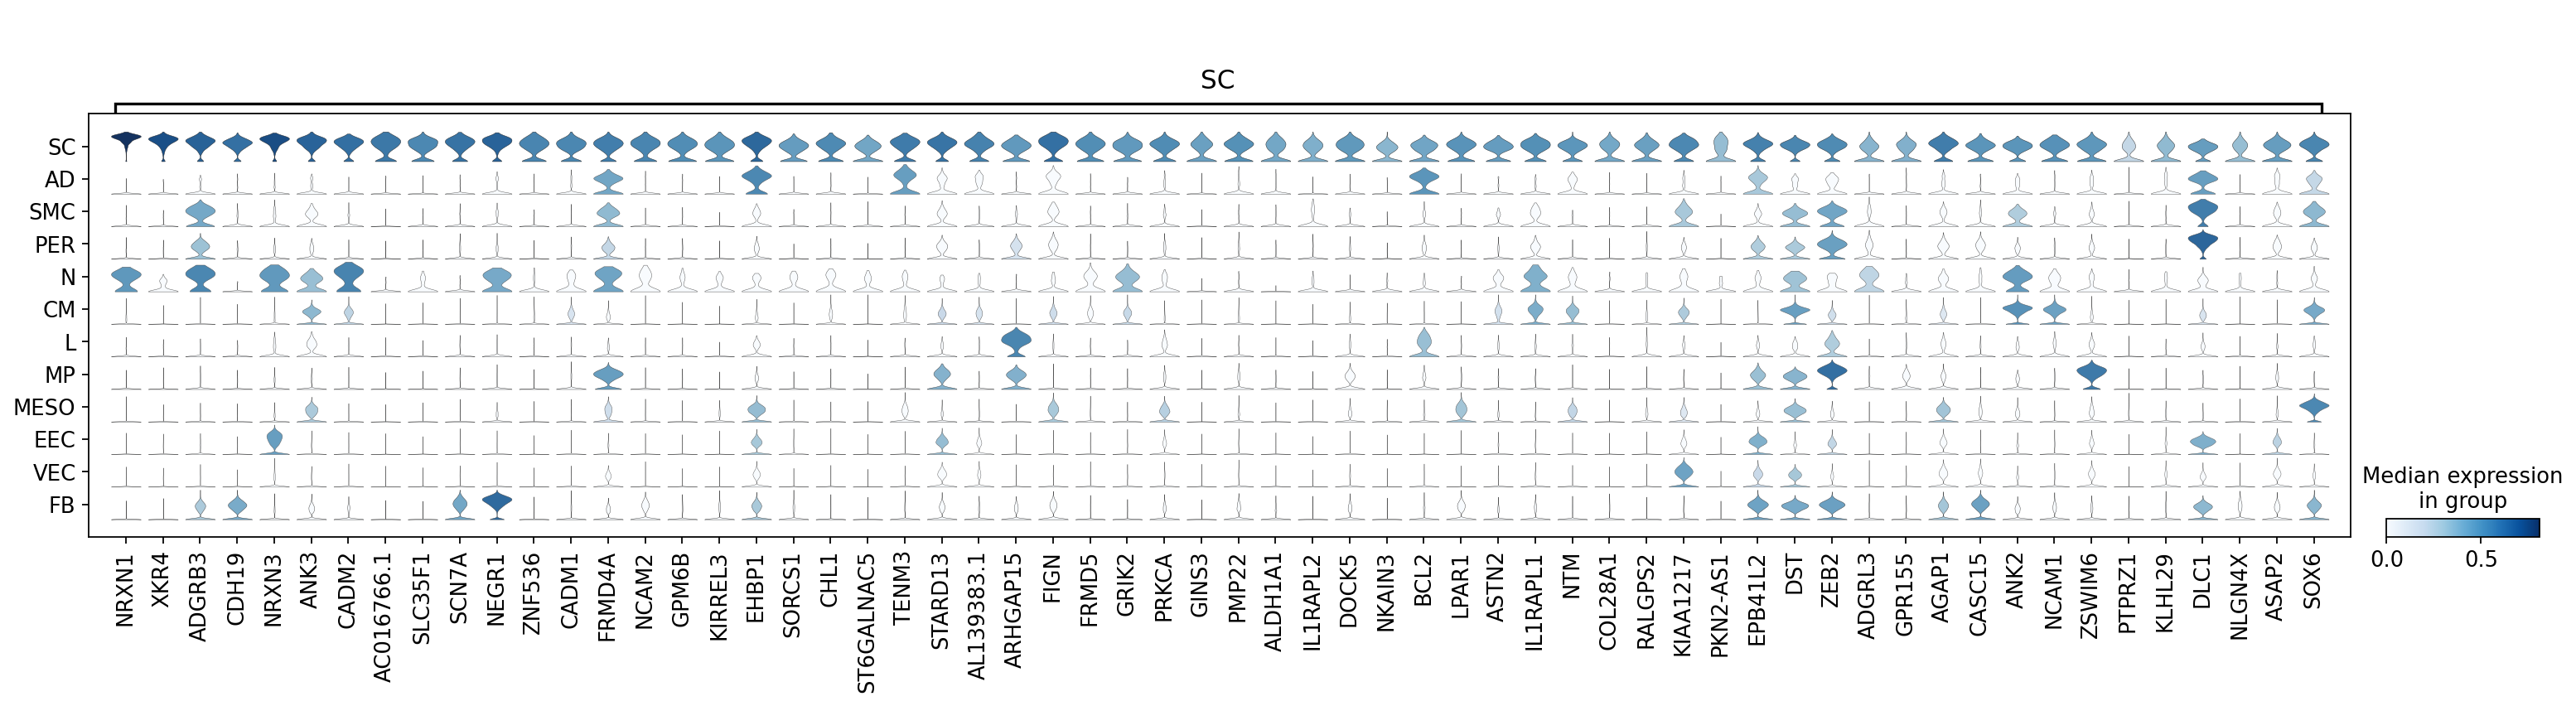

/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


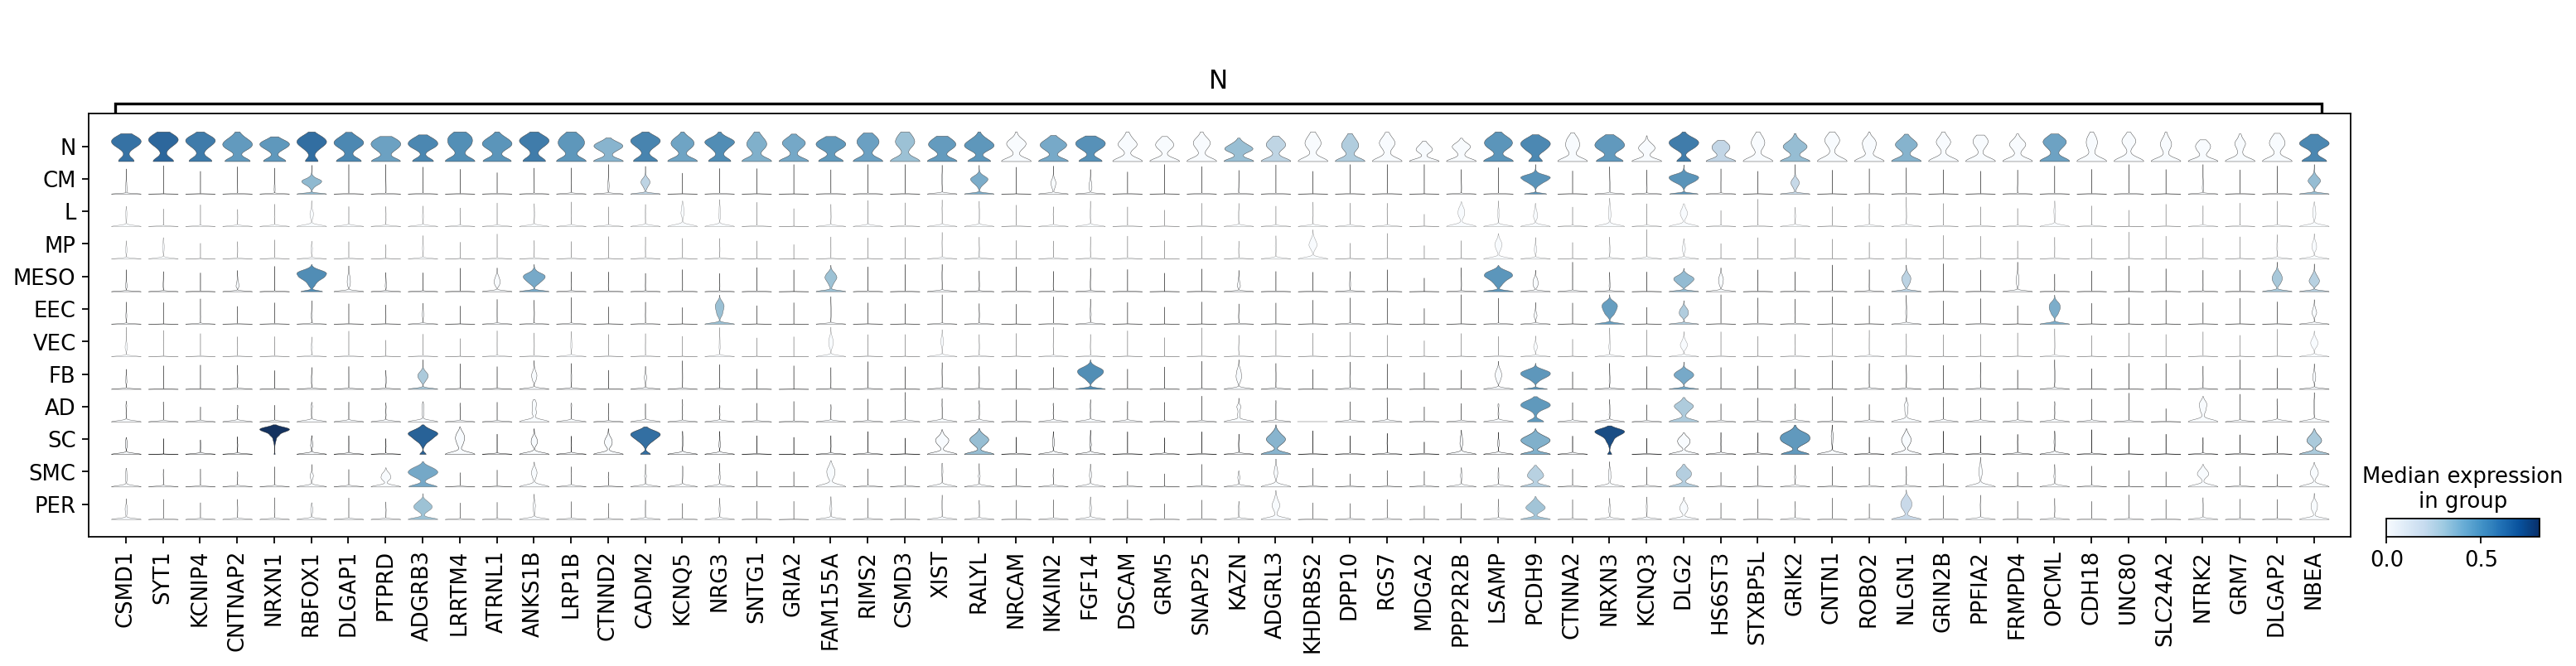

In [5]:
adata.obs.cell_types = adata.obs.cell_types.cat.reorder_categories(["AD", "SC", "SMC", "PER", "N", "CM", "L", "MP", "MESO", "EEC", "VEC", "FB"])
sc.pl.rank_genes_groups_stacked_violin(adata, groupby = "cell_types", n_genes = 60, groups = ["AD"], dendrogram = False, standard_scale = "var")
adata.obs.cell_types = adata.obs.cell_types.cat.reorder_categories(["SC", "AD", "SMC", "PER", "N", "CM", "L", "MP", "MESO", "EEC", "VEC", "FB"])
sc.pl.rank_genes_groups_stacked_violin(adata, groupby = "cell_types", n_genes = 60, groups = ["SC"], dendrogram = False, standard_scale = "var")
adata.obs.cell_types = adata.obs.cell_types.cat.reorder_categories(["N", "CM", "L", "MP", "MESO", "EEC", "VEC", "FB", "AD", "SC", "SMC", "PER",])
sc.pl.rank_genes_groups_stacked_violin(adata, groupby = "cell_types", n_genes = 60, groups = ["N"], dendrogram = False, standard_scale = "var")

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    558 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    602 total control genes are used. (0:00:02)
-->     'phase', cell cycle phase (adata.obs)


/home/schmauch/data/conda/envs/project2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'phase' as categorical


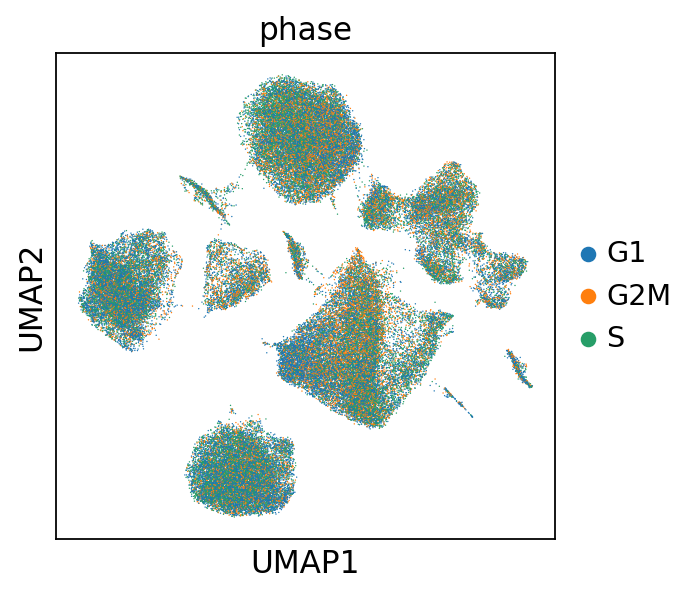

In [3]:
cell_cycle_genes = [x.strip() for x in open('../data/regev_lab_cell_cycle_genes.txt')]

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

adata.obs.phase.value_counts()

sc.pl.umap(adata, color = 'phase')

In [4]:
adata.obs

n_genes  percent_mito  n_counts  doublet_score batch  \
cell_1_13-0           1110      0.099585    1687.0       0.070015     1   
cell_1_14-0            995      0.102985    1340.0       0.072449     1   
cell_1_15-0           1135      0.094244    1581.0       0.030474     1   
cell_1_16-0           1179      0.064593    1672.0       0.021225     1   
cell_1_26-0           1037      0.077736    1608.0       0.083453     1   
...                    ...           ...       ...            ...   ...   
cell_174_10086-12     2050      0.143857    4143.0       0.041025     3   
cell_174_10087-12     3274      0.079461    7790.0       0.054911     3   
cell_174_10089-12     2118      0.011379    3779.0       0.028820     3   
cell_174_10092-12     2405      0.062819    4314.0       0.028820     3   
cell_174_10094-12     3453      0.063403    7823.0       0.039591     3   

                  sample_id      phenotype leiden cell_types   S_score  \
cell_1_13-0               1            CAD      4         CM  0.059872   
cell_1_14-0               1            CAD      0         FB -0.052022   
cell_1_15-0               1            CAD      0         FB  0.137471   
cell_1_16-0               1            CAD      0         FB -0.042898   
cell_1_26-0               1            CAD      3         CM -0.029453   
...                     ...            ...    ...        ...       ...   
cell_174_10086-12       174  HF_Congestive      4         CM  0.009659   
cell_174_10087-12       174  HF_Congestive      2       MESO -0.016740   
cell_174_10089-12       174  HF_Congestive      2       MESO -0.052003   
cell_174_10092-12       174  HF_Congestive      1        EEC  0.009158   
cell_174_10094-12       174  HF_Congestive     12       MESO -0.021187   

                   G2M_score phase  
cell_1_13-0        -0.030990     S  
cell_1_14-0        -0.015906    G1  
cell_1_15-0         0.073805     S  
cell_1_16-0        -0.048418    G1  
cell_1_26-0         0.021337   G2M  
...                      ...   ...  
cell_174_10086-12  -0.023706     S  
cell_174_10087-12  -0.022008    G1  
cell_174_10089-12  -0.024523    G1  
cell_174_10092-12   0.063907   G2M  
cell_174_10094-12  -0.041356    G1  

[76087 rows x 12 columns]

AnnData object with n_obs × n_vars = 1383 × 33538
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'batch', 'sample_id', 'phenotype', 'leiden', 'cell_types', 'S_score', 'G2M_score', 'phase', 'old_leiden'
    var: 'gene_ids', 'feature_types', 'genome'
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


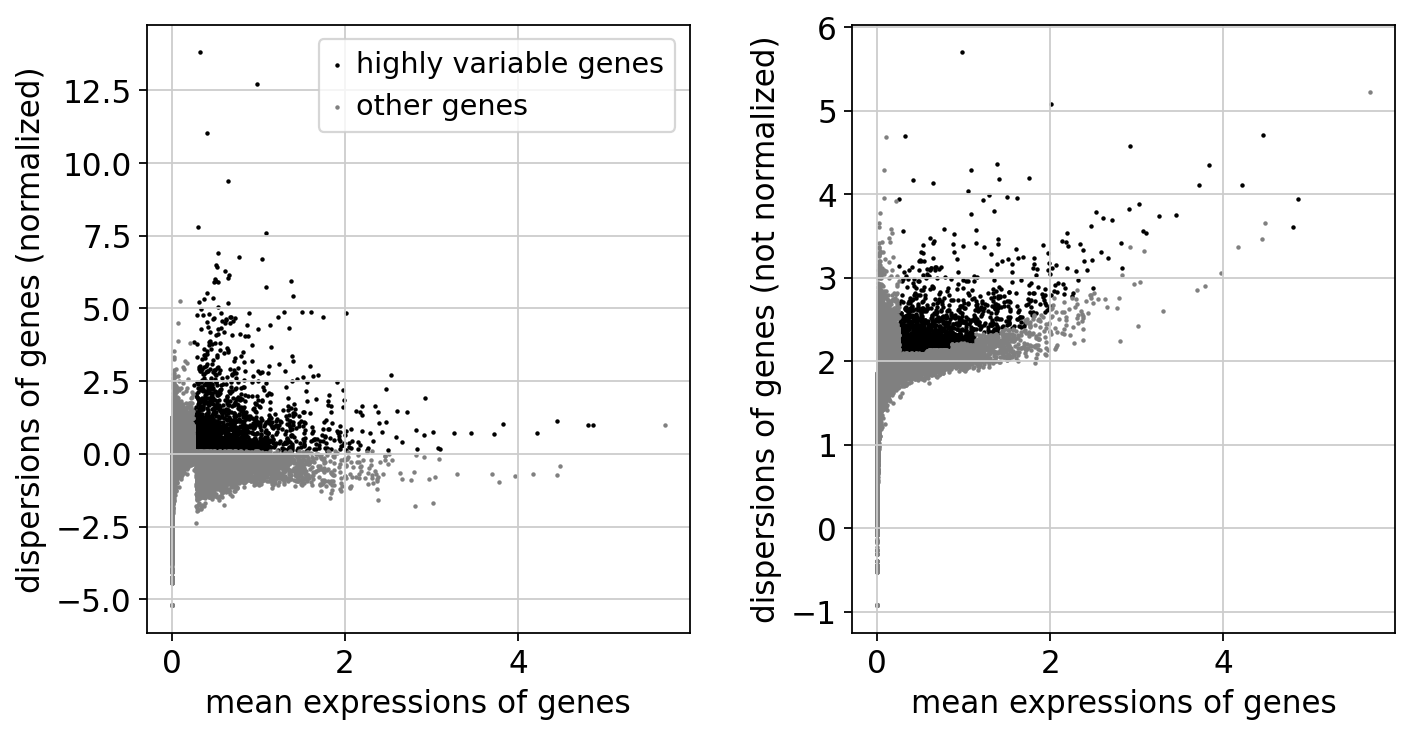

View of AnnData object with n_obs × n_vars = 1383 × 2544
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'batch', 'sample_id', 'phenotype', 'leiden', 'cell_types', 'S_score', 'G2M_score', 'phase', 'old_leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
View of AnnData object with n_obs × n_vars = 1383 × 2544
    obs: 'n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'batch', 'sample_id', 'phenotype', 'leiden', 'cell_types', 'S_score', 'G2M_score', 'phase', 'old_leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'


Trying to set attribute `.var` of view, copying.


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)
['TTN', 'RYR2', 'FGF12', 'LDB3', 'MYBPC3', 'RBM20', 'SLC8A1', 'TECRL', 'CHRM2', 'MLIP', 'CACNA1C', 'TRDN', 'ERBB4', 'PAM', 'CTNNA3', 'PPP1R12B', 'SORBS2', 'NEBL', 'PALLD', 'CADPS', 'TNNT2', 'ZNF385B', 'MYOM2', 'CACNB2', 'DMD', 'TBX5', 'SGCD', 'CMYA5', 'CDH2', 'ESRRG', 'LINC02248', 'MYL7', 'KCNJ3', 'ANK2', 'MYOM1', 'MYH6', 'PDE4DIP', 'SORBS1', 'TACC2', 'RABGAP1L', 'DPY19L2', 'WNK2', 'PXDNL', 'CORIN', 'MITF', 'PDLIM5', 'RALYL', 'ATP2A2', 'NCAM1', 'FHOD3', 'OBSCN', 'MYLK3', 'DTNA', 'DAPK2', 'ACTN2', 'ANKRD1', 'MYO18B', 'GREB1L', 'NEXN', 'OTOGL', 'NCKAP5', 'MYOCD', 'SYNPR', 'PRKAA2', 'PDE3A', 'CD36', 'AKAP6', 'AD

2021-05-13 14:21:17,008 - harmonypy - INFO - Iteration 1 of 10
2021-05-13 14:21:17,897 - harmonypy - INFO - Iteration 2 of 10
2021-05-13 14:21:18,165 - harmonypy - INFO - Iteration 3 of 10
2021-05-13 14:21:18,449 - harmonypy - INFO - Iteration 4 of 10
2021-05-13 14:21:18,603 - harmonypy - INFO - Iteration 5 of 10
2021-05-13 14:21:18,817 - harmonypy - INFO - Iteration 6 of 10
2021-05-13 14:21:19,047 - harmonypy - INFO - Iteration 7 of 10
2021-05-13 14:21:19,253 - harmonypy - INFO - Iteration 8 of 10
2021-05-13 14:21:19,522 - harmonypy - INFO - Iteration 9 of 10
2021-05-13 14:21:19,793 - harmonypy - INFO - Iteration 10 of 10
2021-05-13 14:21:19,982 - harmonypy - INFO - Stopped before convergence


computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


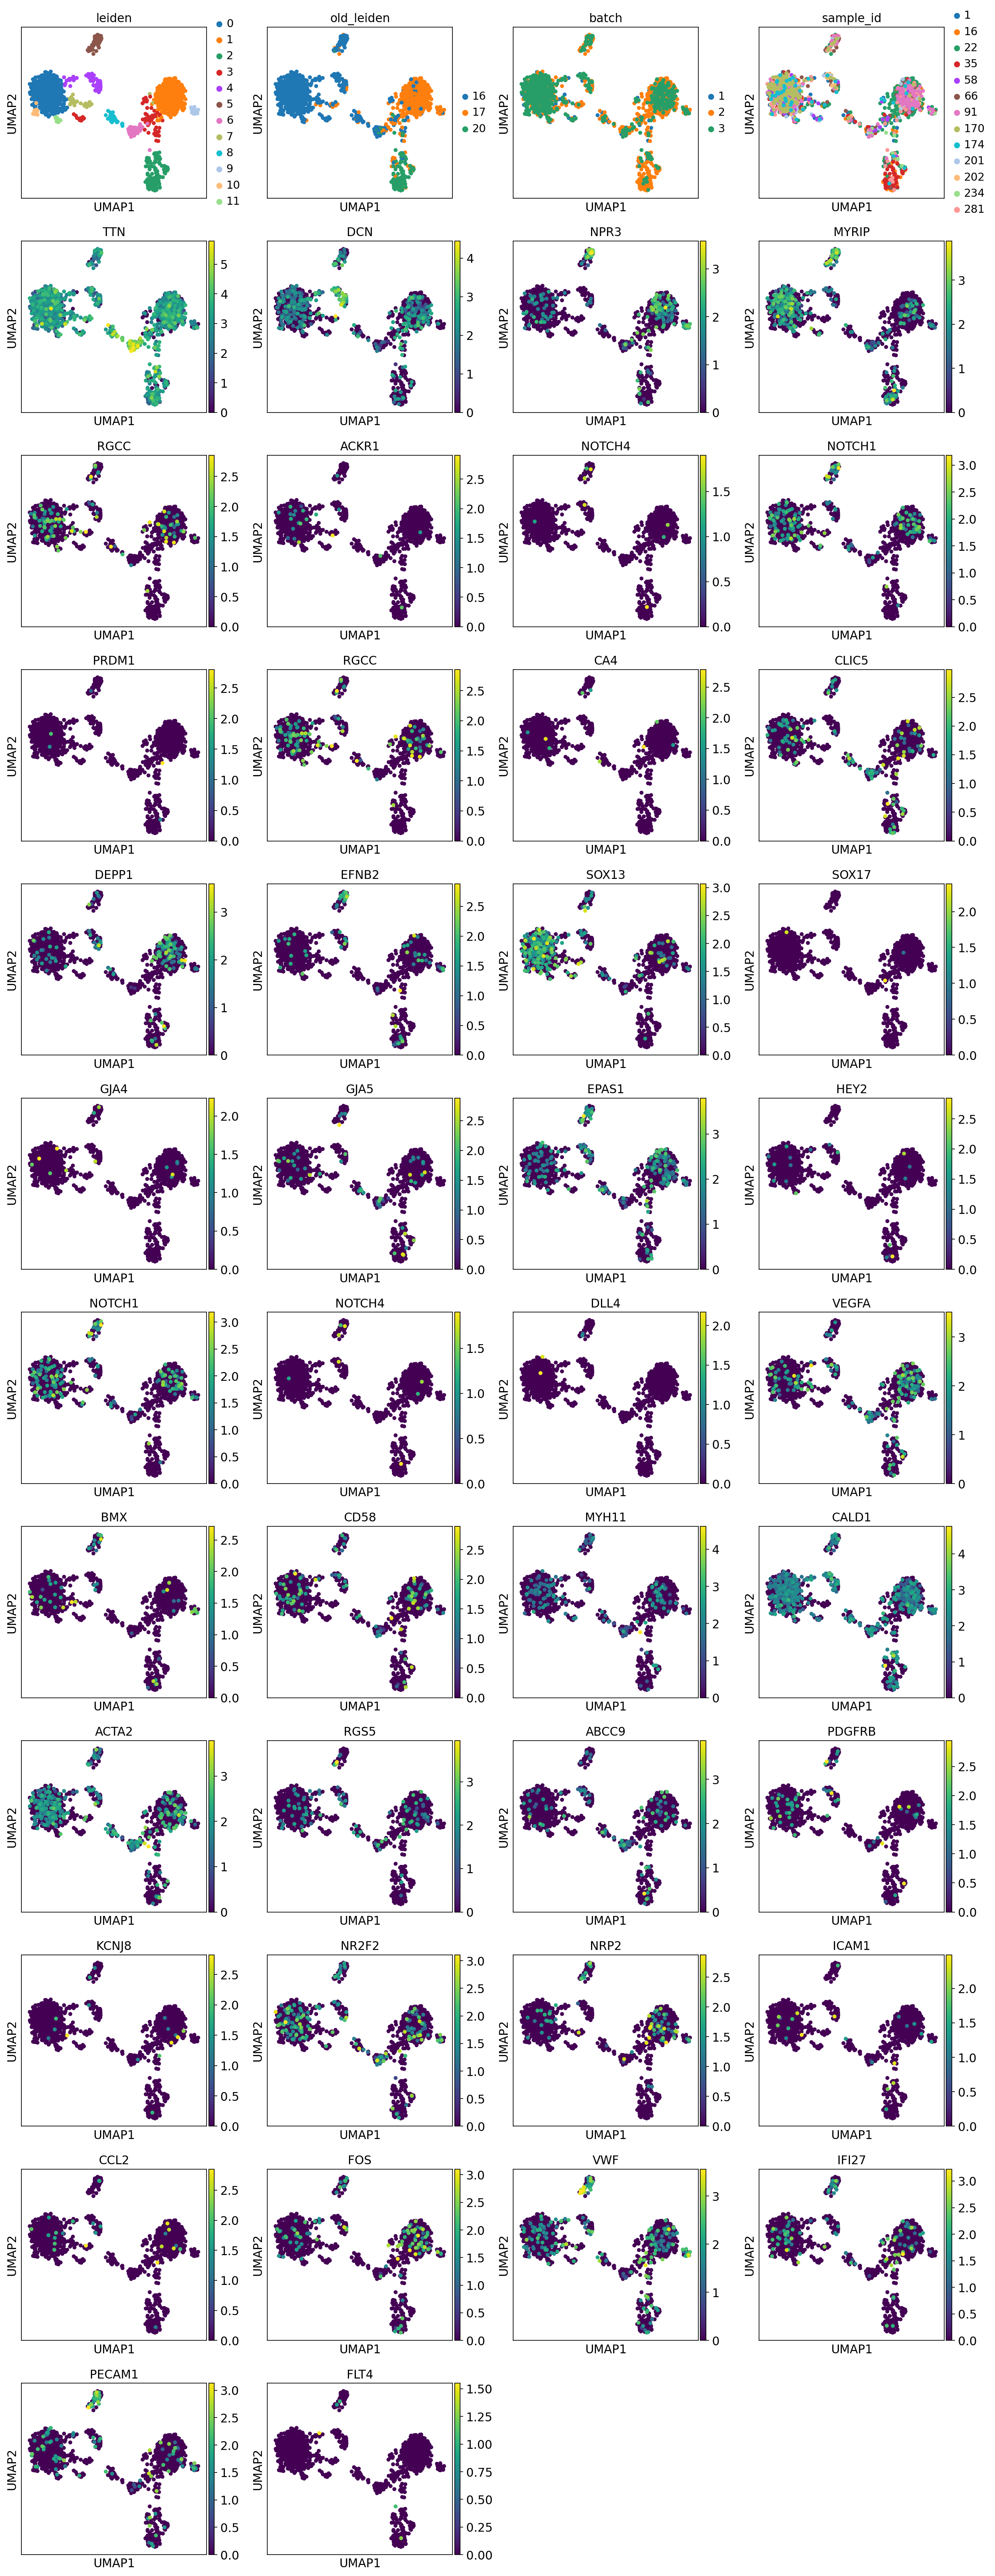

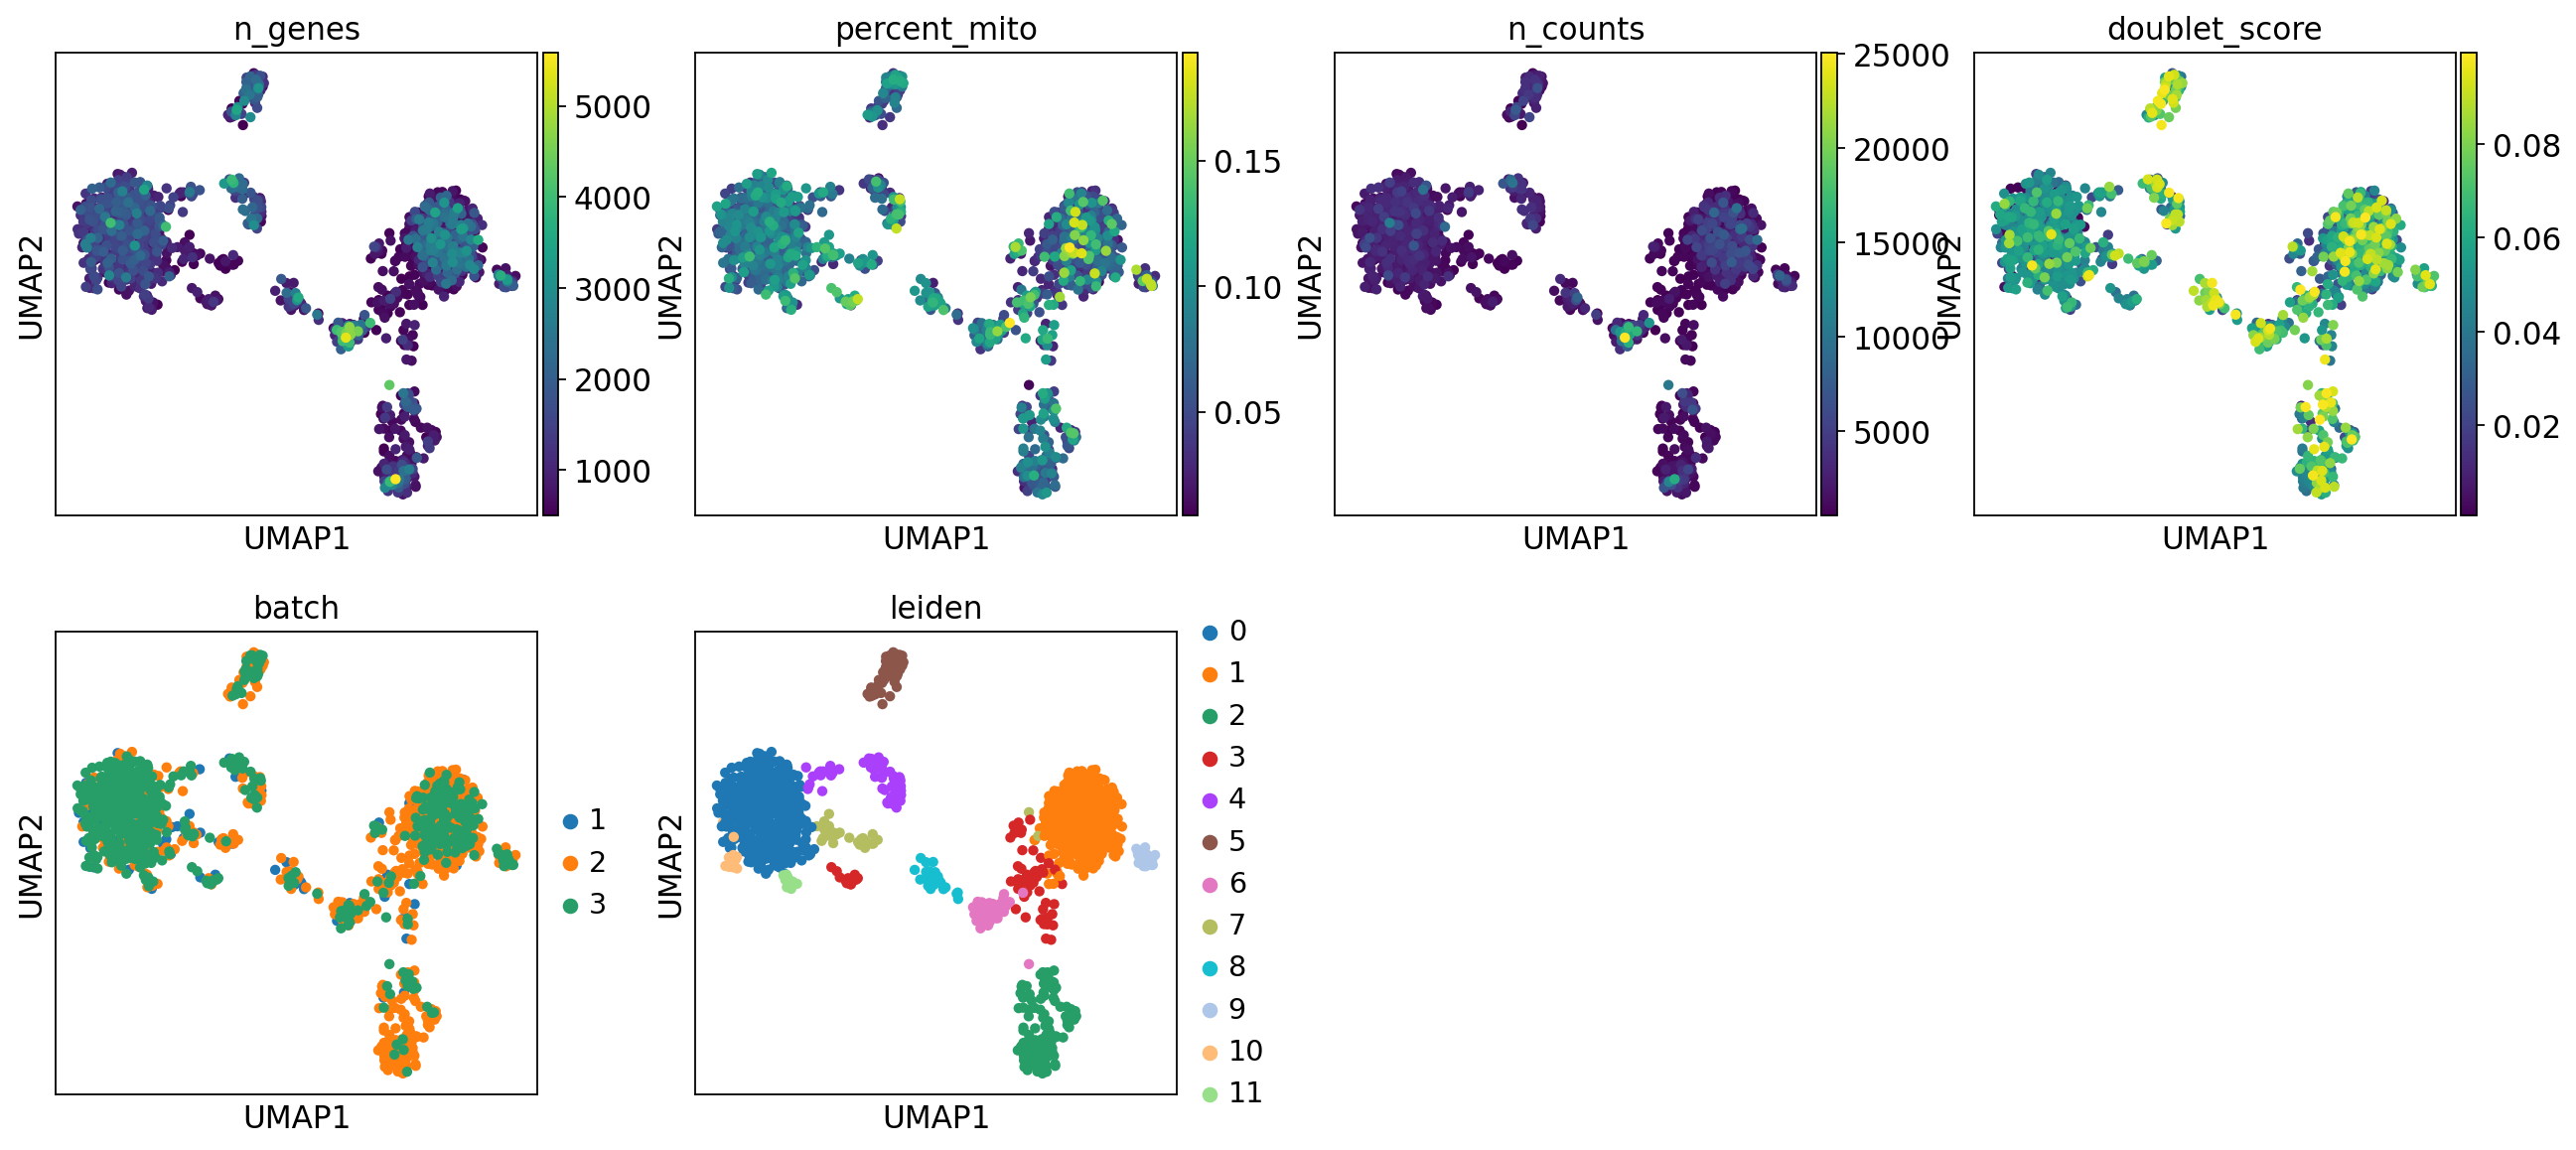

In [14]:
adata.obs['old_leiden'] = adata.obs.leiden
subadata2 = adata[adata.obs.cell_types.isin(['AD', 'SC', 'N'])]
subraw = sc.AnnData(subadata2.raw.X.toarray(), var = subadata2.raw.var, obs = subadata2.obs)
print(subraw)
sc.pp.highly_variable_genes(subraw, min_mean=0.25, max_mean=5, min_disp=0.10)
rcParams['figure.figsize'] = 5,5
sc.pl.highly_variable_genes(subraw)
subraw.raw = subraw
subraw = subraw[:, subraw.var.highly_variable]
print(subraw)
subadata2 = subraw
print(subadata2)

subadata2.var['rps'] = subadata2.var_names.str.startswith('RPS')
subadata2.var['rpl'] = subadata2.var_names.str.startswith('RPL')
subadata2.var['mt'] = subadata2.var_names.str.startswith('MT-')
sc.tl.rank_genes_groups(adata, 'cell_types', method='t-test', n_genes = 1000)
df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(1000)
print(list(df.loc[0:500, 'CM']))
subadata2.var['cm'] = subadata2.var_names.isin(list(df.loc[0:999, 'CM']))

subadata2 = subadata2[:,~(subadata2.var['cm'] | subadata2.var['rps'] | subadata2.var['rpl'] | subadata2.var['mt'])]
#subadata = subadata[:,subadata.var.index.isin(subraw.var.index)]
print(subadata2)
sc.pp.regress_out(subadata2, ['n_counts', 'percent_mito'])
sc.pp.scale(subadata2, max_value=10)
sc.tl.pca(subadata2, svd_solver='arpack')
ho = hm.run_harmony(subadata2.obsm['X_pca'], subadata2.obs, "sample_id", max_iter_kmeans=50)
subadata2.obsm['X_pca'] = ho.Z_cos.T
sc.pp.neighbors(subadata2, n_neighbors=10, n_pcs=40)
sc.tl.umap(subadata2)
sc.tl.leiden(subadata2, resolution = 1)
rcParams['figure.figsize'] = 4,4
sc.pl.umap(subadata2, color=['leiden', 'old_leiden', 'batch', 'sample_id', 'TTN', 'DCN', 'NPR3', 'MYRIP', 'RGCC', 'ACKR1', 
               'NOTCH4', 'NOTCH1', 'PRDM1',
               'RGCC', 'CA4', 'CLIC5',
               "DEPP1", "EFNB2", "SOX13", "SOX17", "GJA4", "GJA5", "EPAS1", "HEY2", "NOTCH1"
                         ,"NOTCH4", "DLL4", "VEGFA", "BMX", "CD58",
               "MYH11", "CALD1", "ACTA2", 
               "RGS5", "ABCC9", "PDGFRB", "KCNJ8",
               'NR2F2', 'NRP2', 'ICAM1', 'CCL2', 'FOS',
              "VWF", "IFI27", "PECAM1", 'FLT4'])
sc.pl.umap(subadata2, color = ['n_genes', 'percent_mito', 'n_counts', 'doublet_score', 'batch', 'leiden'])

In [18]:
subadata = subadata2

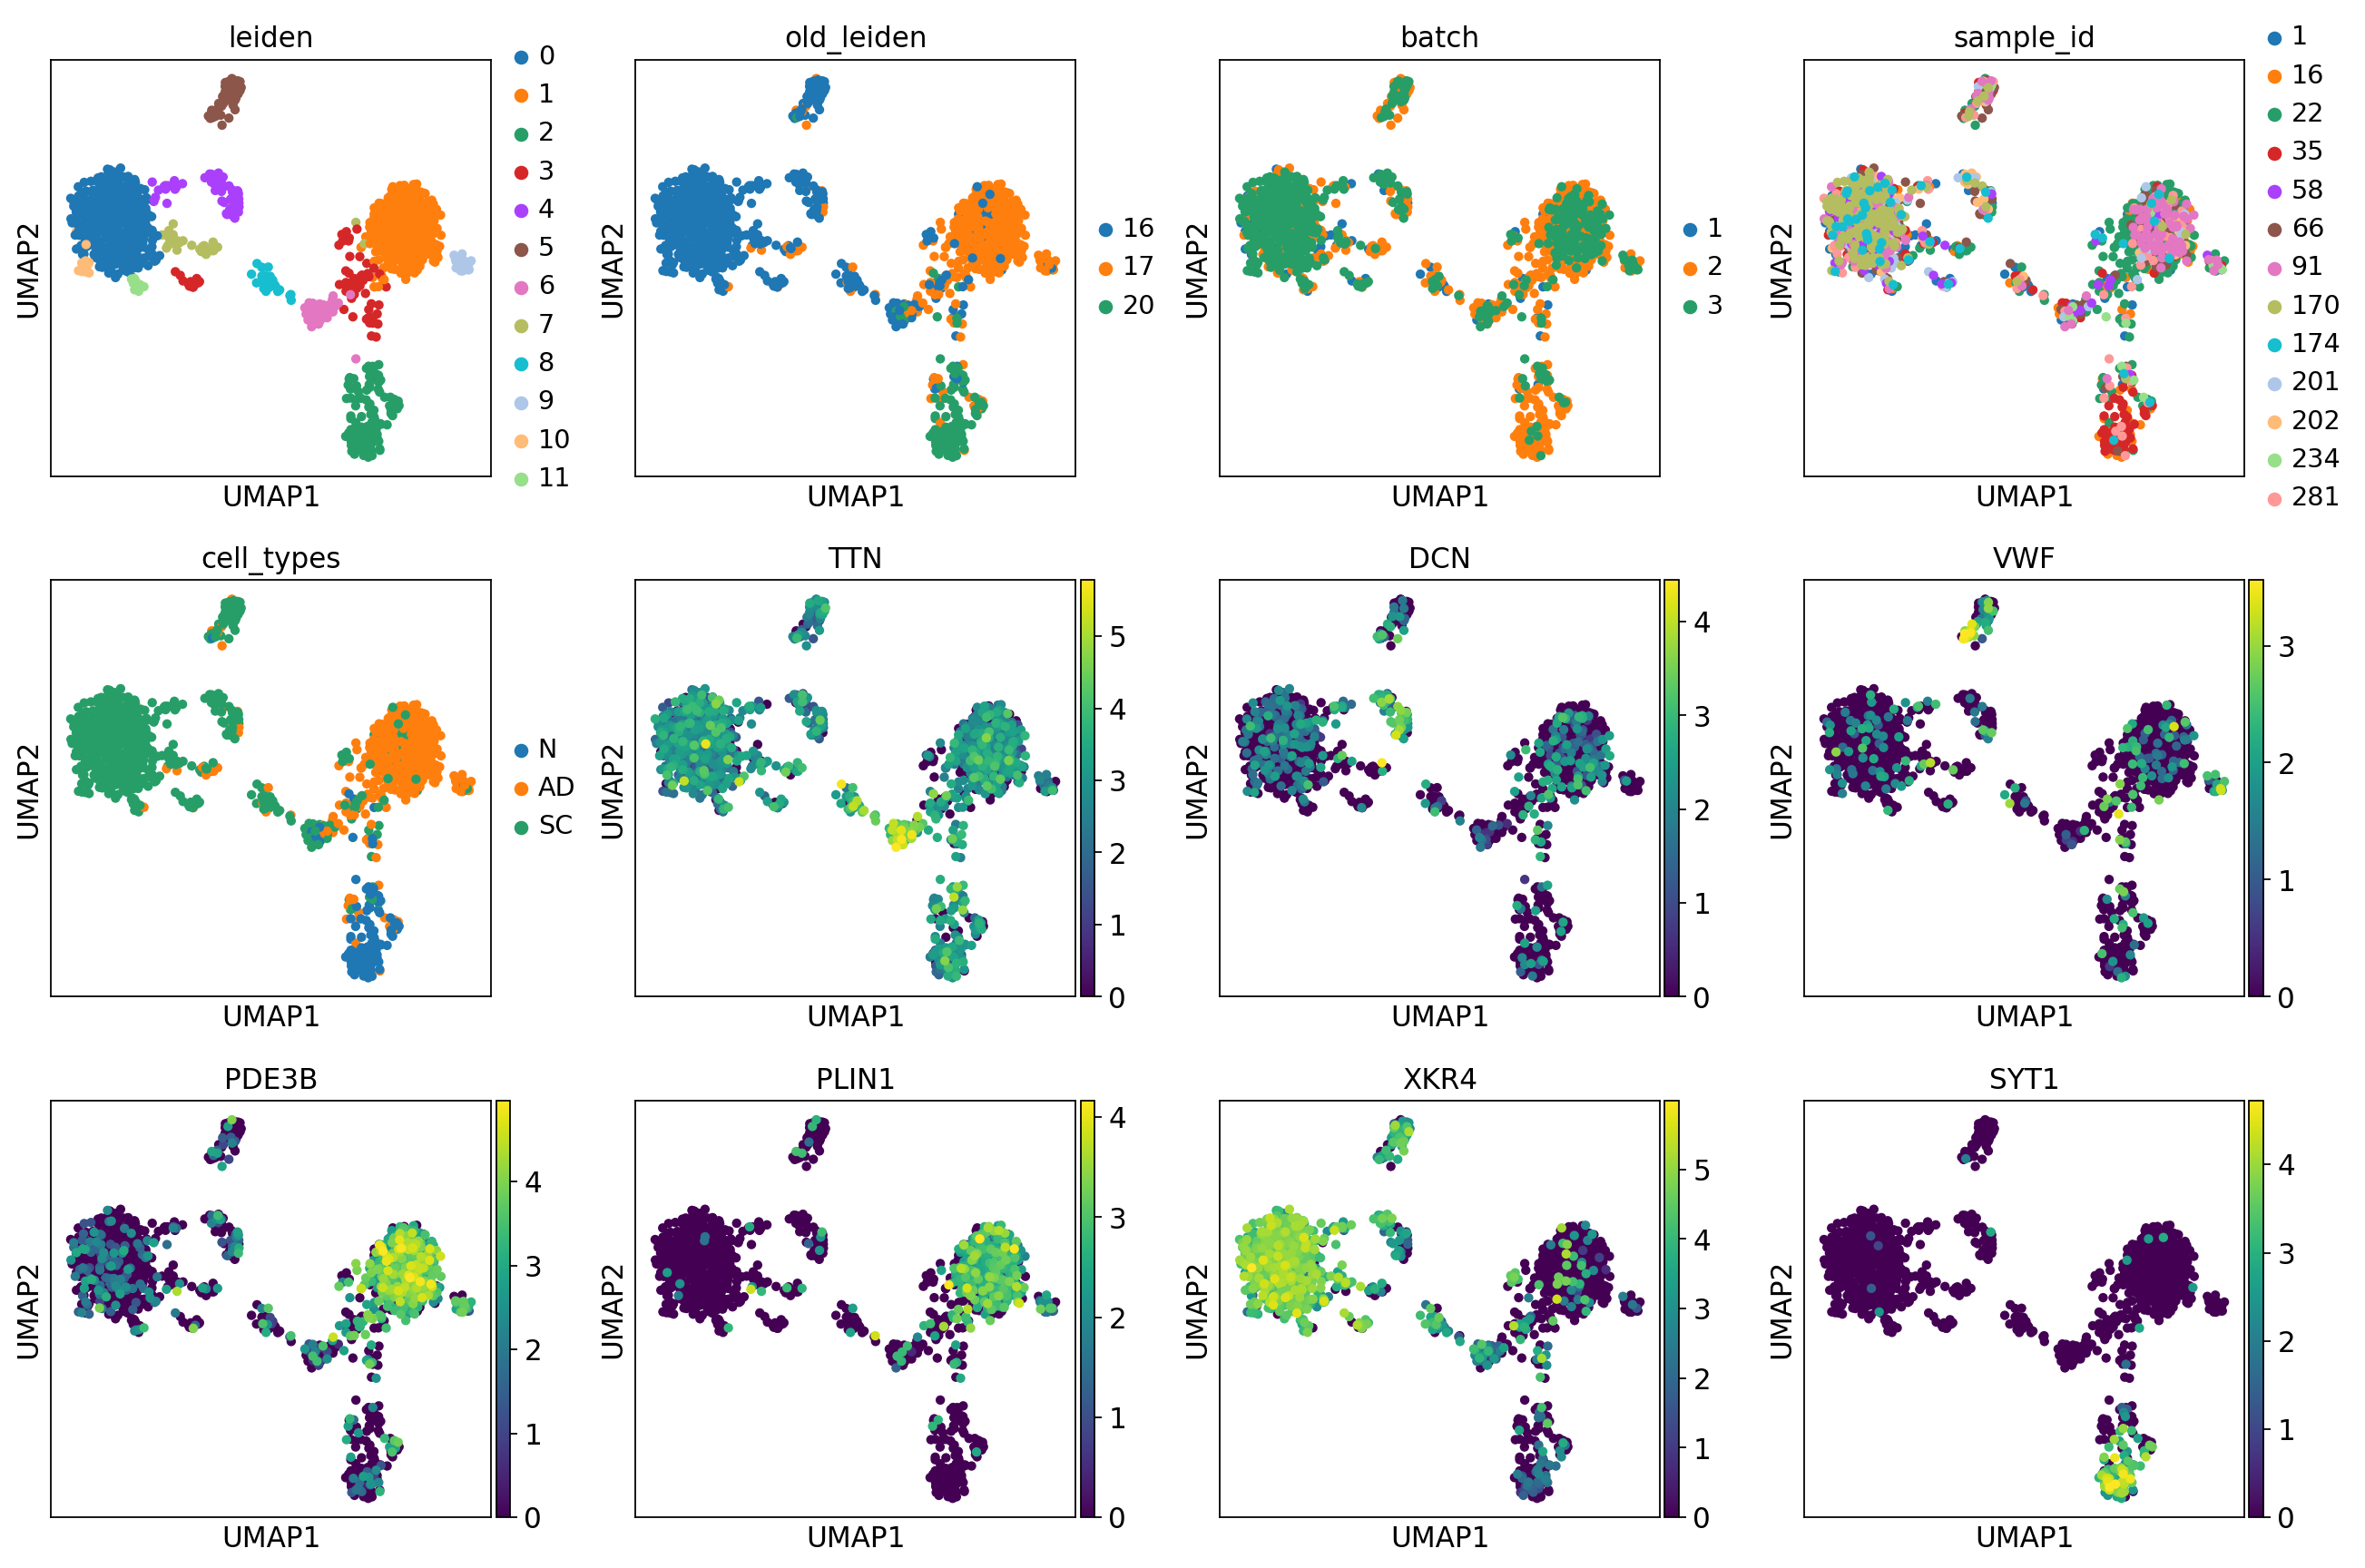

In [19]:
sc.pl.umap(subadata2, color=['leiden', 'old_leiden', 'batch', 'sample_id', "cell_types", 'TTN', 'DCN', 'VWF', 
                             'PDE3B', 'PLIN1', 'XKR4', 'SYT1'])

    using 'X_pca' with n_pcs = 30
Storing dendrogram info using `.uns["dendrogram_['leiden']"]`
    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden']`


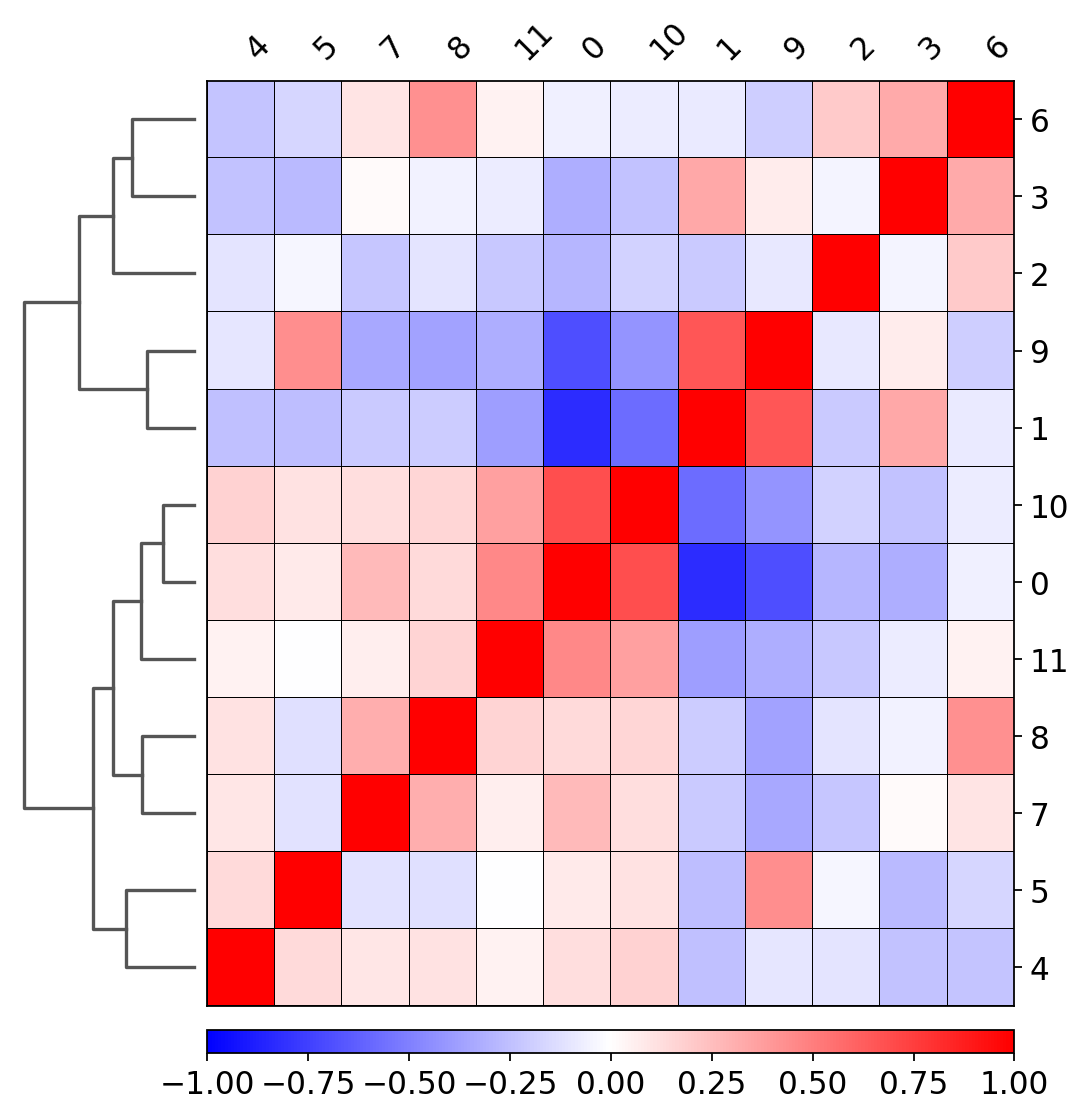

/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


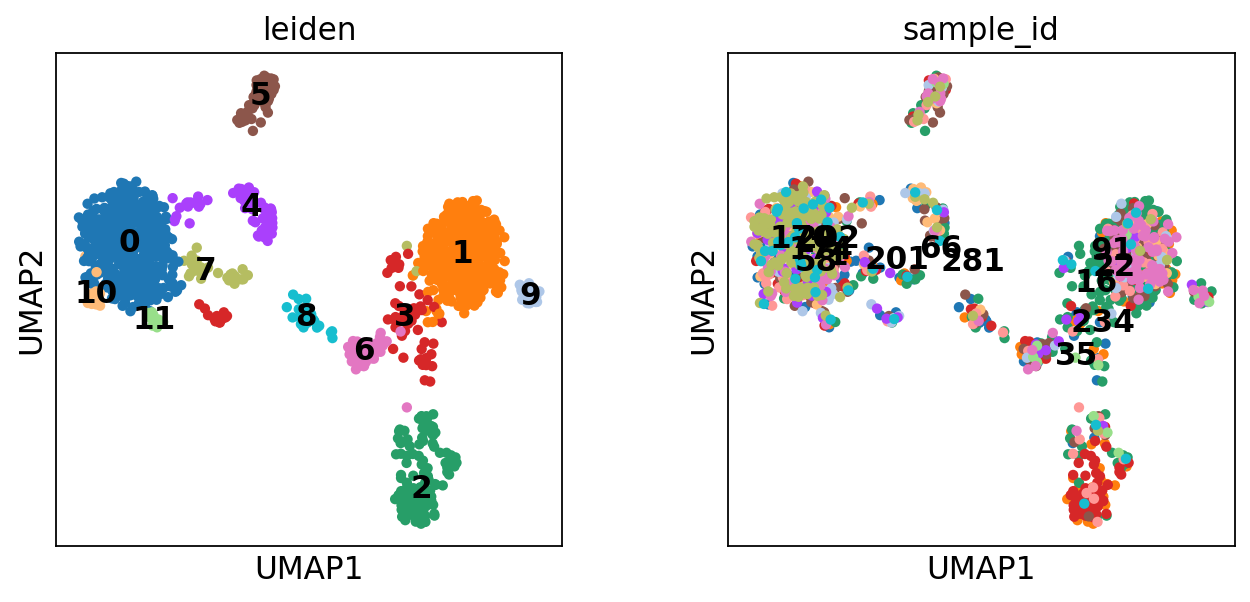

In [20]:
sc.tl.dendrogram(subadata, 'leiden', n_pcs=30)
ax = sc.pl.correlation_matrix(subadata, 'leiden', figsize = (8,8))
sc.pl.umap(subadata, color = ['leiden', 'sample_id'], legend_loc = 'on data')

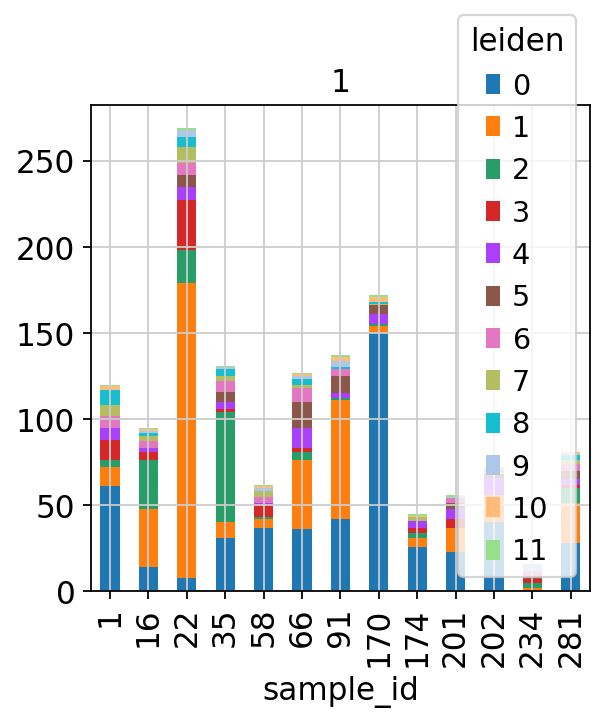

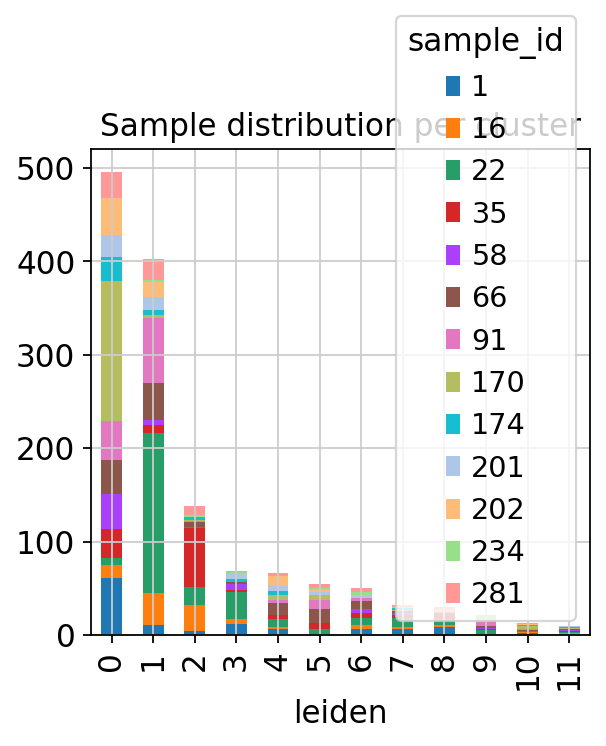

In [21]:
test = subadata.obs.groupby(['leiden','sample_id']).size().unstack(fill_value=0)
test.columns = test.columns.astype('str')
#test.insert(0, "All", test.sum(axis = 1), True)
test.T.plot.bar(stacked=True, title="1");
test.plot.bar(stacked=True, title="Sample distribution per cluster");

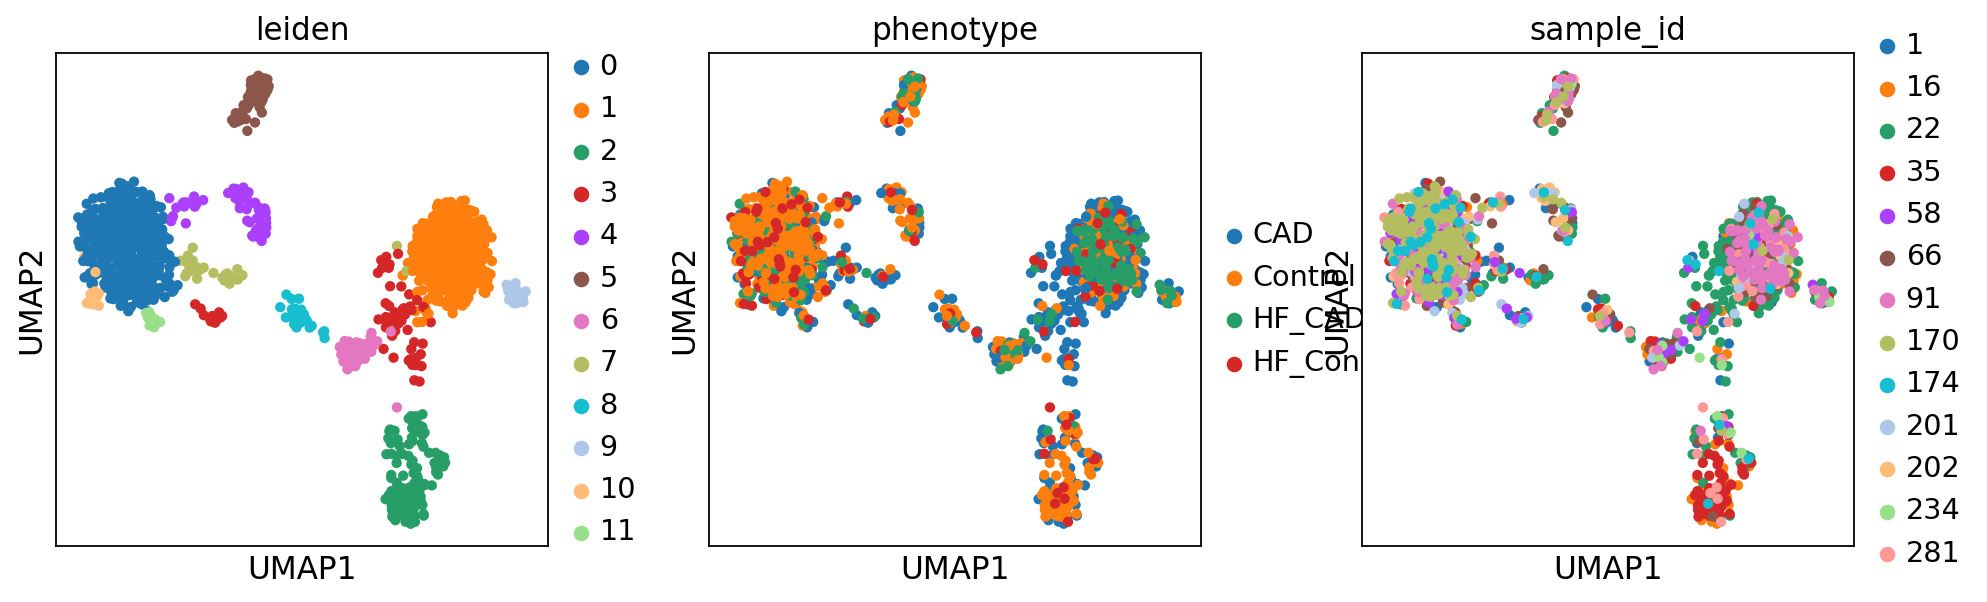

In [22]:
sc.pl.umap(subadata, color = ['leiden', 'phenotype', 'sample_id'])

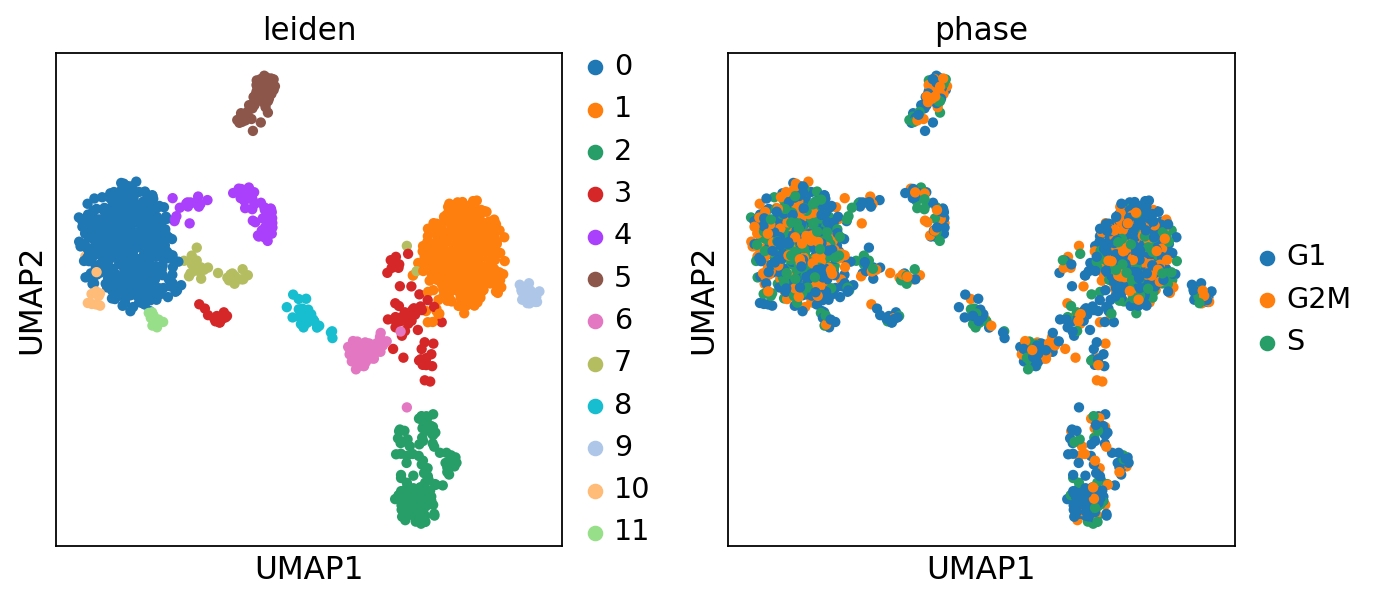

In [23]:
sc.pl.umap(subadata, color = ['leiden', 'phase'])

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


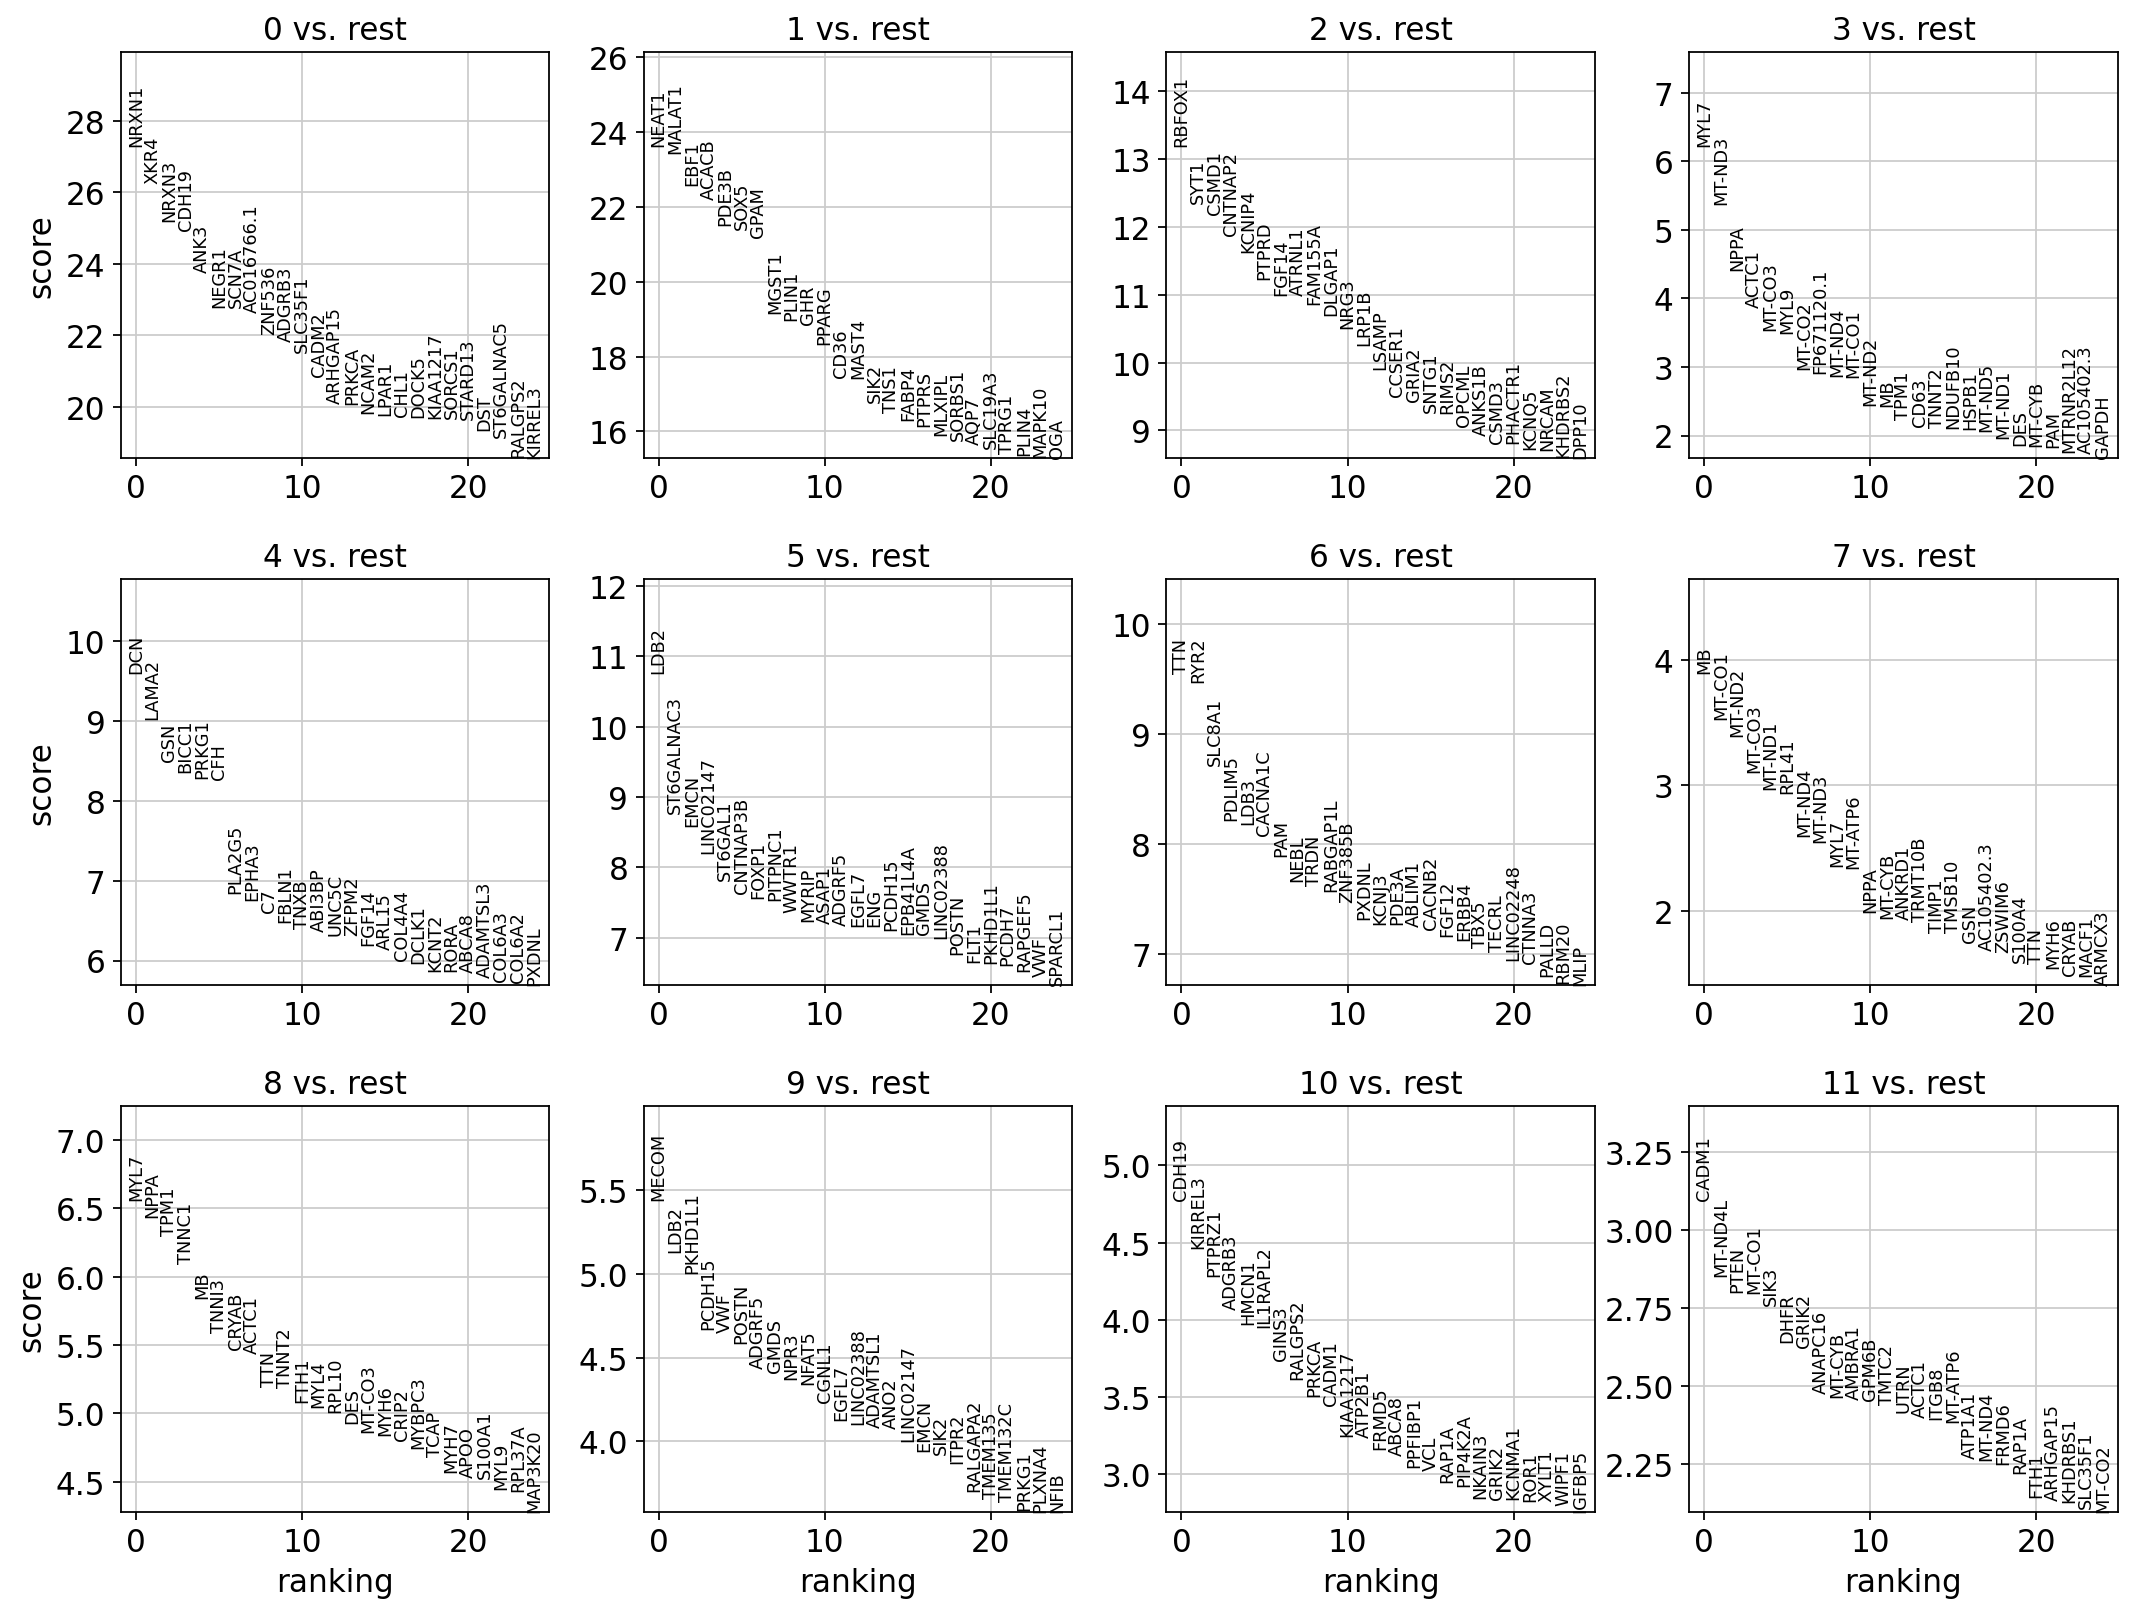

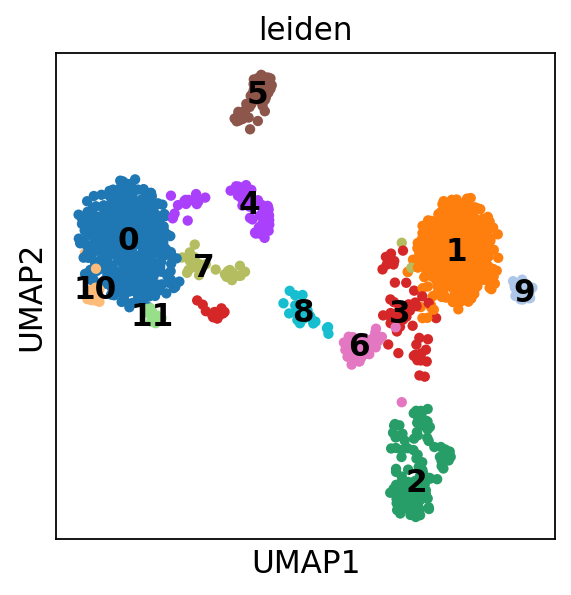

0        1        2           3         4           5          6  \
0        NRXN1    NEAT1   RBFOX1        MYL7       DCN        LDB2        TTN   
1         XKR4   MALAT1     SYT1      MT-ND3     LAMA2  ST6GALNAC3       RYR2   
2        NRXN3     EBF1    CSMD1        NPPA       GSN        EMCN     SLC8A1   
3        CDH19    ACACB  CNTNAP2       ACTC1     BICC1   LINC02147     PDLIM5   
4         ANK3    PDE3B   KCNIP4      MT-CO3     PRKG1     ST6GAL1       LDB3   
5        NEGR1     SOX5    PTPRD        MYL9       CFH    CNTNAP3B    CACNA1C   
6        SCN7A     GPAM    FGF14      MT-CO2    PLA2G5       FOXP1        PAM   
7   AC016766.1    MGST1   ATRNL1  FP671120.1     EPHA3     PITPNC1       NEBL   
8       ZNF536    PLIN1  FAM155A      MT-ND4        C7       WWTR1       TRDN   
9       ADGRB3      GHR   DLGAP1      MT-CO1     FBLN1       MYRIP   RABGAP1L   
10     SLC35F1    PPARG     NRG3      MT-ND2      TNXB       ASAP1    ZNF385B   
11       CADM2     CD36    LRP1B          MB    ABI3BP      ADGRF5      PXDNL   
12    ARHGAP15    MAST4    LSAMP        TPM1     UNC5C       EGFL7      KCNJ3   
13       PRKCA     SIK2   CCSER1        CD63     ZFPM2         ENG      PDE3A   
14       NCAM2     TNS1    GRIA2       TNNT2     FGF14      PCDH15     ABLIM1   
15       LPAR1    FABP4    SNTG1     NDUFB10     ARL15    EPB41L4A     CACNB2   
16        CHL1    PTPRS    RIMS2       HSPB1    COL4A4        GMDS      FGF12   
17       DOCK5   MLXIPL    OPCML      MT-ND5     DCLK1   LINC02388      ERBB4   
18    KIAA1217   SORBS1   ANKS1B      MT-ND1     KCNT2       POSTN       TBX5   
19      SORCS1     AQP7    CSMD3         DES      RORA        FLT1      TECRL   
20     STARD13  SLC19A3  PHACTR1      MT-CYB     ABCA8     PKHD1L1  LINC02248   
21         DST    TPRG1    KCNQ5         PAM  ADAMTSL3       PCDH7     CTNNA3   
22  ST6GALNAC5    PLIN4    NRCAM   MTRNR2L12    COL6A3     RAPGEF5      PALLD   
23     RALGPS2   MAPK10  KHDRBS2  AC105402.3    COL6A2         VWF      RBM20   
24     KIRREL3      OGA    DPP10       GAPDH     PXDNL     SPARCL1       MLIP   

             7        8          9        10        11  
0           MB     MYL7      MECOM     CDH19     CADM1  
1       MT-CO1     NPPA       LDB2   KIRREL3   MT-ND4L  
2       MT-ND2     TPM1    PKHD1L1    PTPRZ1      PTEN  
3       MT-CO3    TNNC1     PCDH15    ADGRB3    MT-CO1  
4       MT-ND1       MB        VWF     HMCN1      SIK3  
5        RPL41    TNNI3      POSTN  IL1RAPL2      DHFR  
6       MT-ND4    CRYAB     ADGRF5     GINS3     GRIK2  
7       MT-ND3    ACTC1       GMDS   RALGPS2   ANAPC16  
8         MYL7      TTN       NPR3     PRKCA    MT-CYB  
9      MT-ATP6    TNNT2      NFAT5     CADM1    AMBRA1  
10        NPPA     FTH1      CGNL1  KIAA1217     GPM6B  
11      MT-CYB     MYL4      EGFL7    ATP2B1     TMTC2  
12      ANKRD1    RPL10  LINC02388     FRMD5      UTRN  
13     TRMT10B      DES   ADAMTSL1     ABCA8     ACTC1  
14       TIMP1   MT-CO3       ANO2   PPFIBP1     ITGB8  
15      TMSB10     MYH6  LINC02147       VCL   MT-ATP6  
16         GSN    CRIP2       EMCN     RAP1A    ATP1A1  
17  AC105402.3   MYBPC3       SIK2   PIP4K2A    MT-ND4  
18      ZSWIM6     TCAP      ITPR2    NKAIN3     FRMD6  
19      S100A4     MYH7   RALGAPA2     GRIK2     RAP1A  
20         TTN     APOO    TMEM135    KCNMA1      FTH1  
21        MYH6   S100A1   TMEM132C      ROR1  ARHGAP15  
22       CRYAB     MYL9      PRKG1     XYLT1   KHDRBS1  
23       MACF1   RPL37A     PLXNA4     WIPF1   SLC35F1  
24      ARMCX3  MAP3K20       NFIB    IGFBP5    MT-CO2

In [24]:
sc.tl.rank_genes_groups(subadata, 'leiden', method='wilcoxon', n_genes = 1000)
sc.pl.rank_genes_groups(subadata, n_genes=25, sharey=False)

sc.pl.umap(subadata, color = 'leiden', legend_loc = 'on data')

pd.DataFrame(subadata.uns['rank_genes_groups']['names']).head(25)

/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


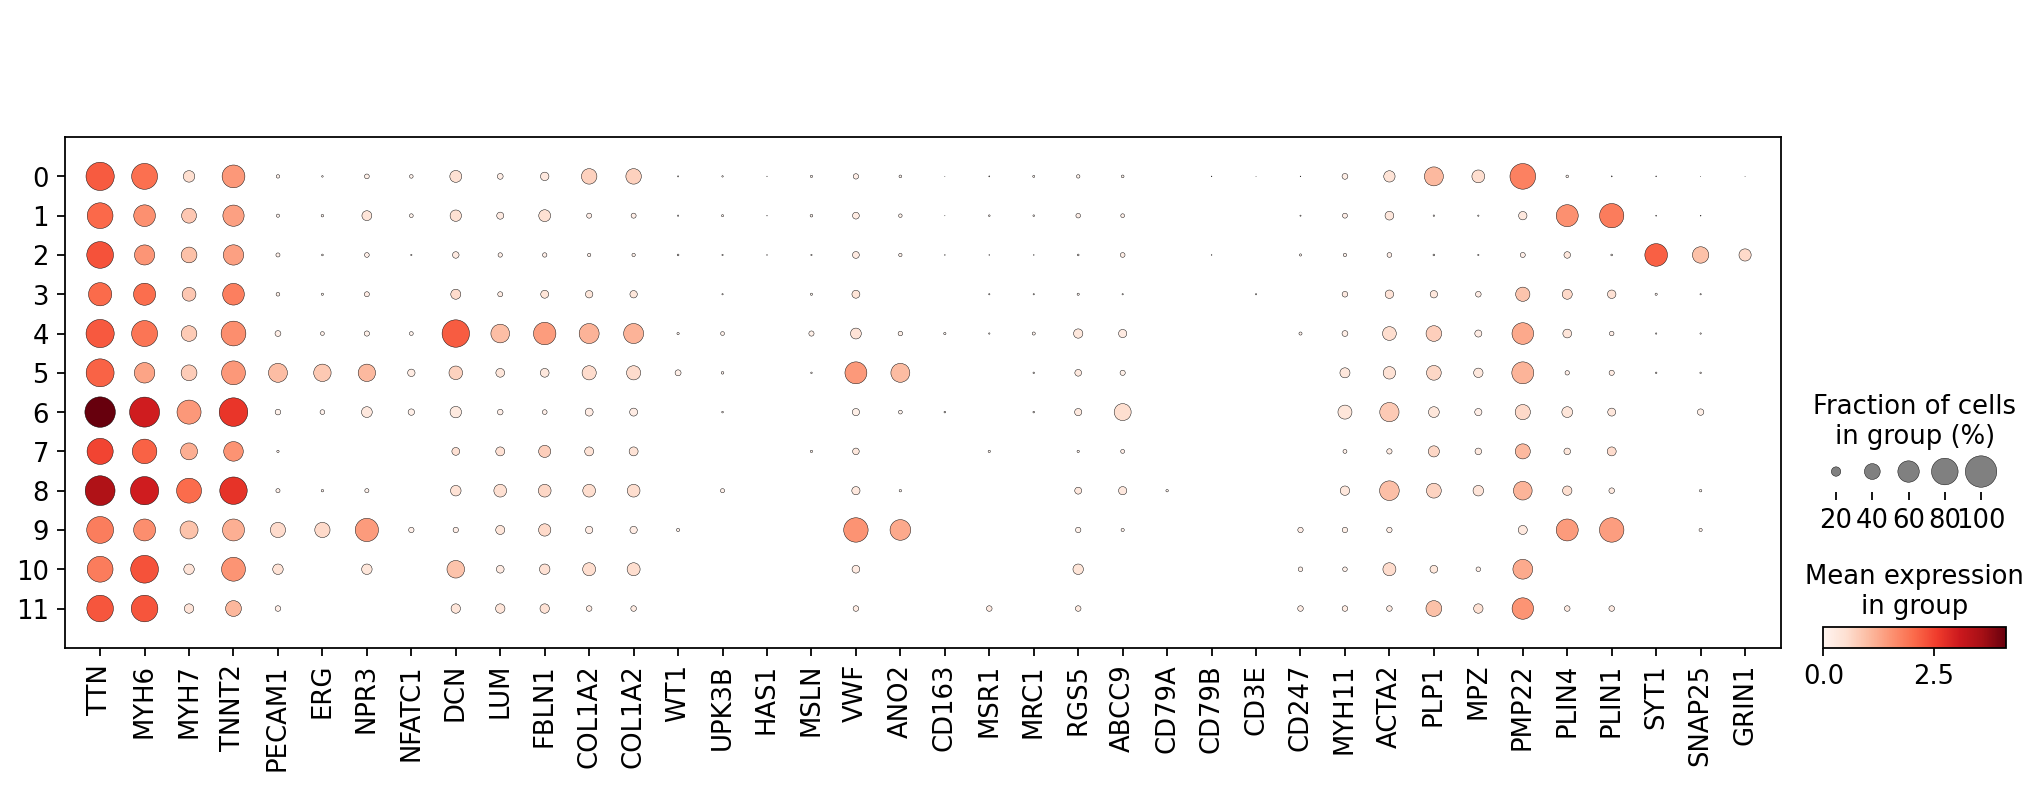

In [25]:
markers_all = ["TTN", "MYH6", "MYH7", "TNNT2", 
               "PECAM1", "ERG",
               "NPR3", "NFATC1", 
               "DCN", "LUM", "FBLN1", "COL1A2", "COL1A2",
               'WT1', 'UPK3B', 'HAS1', 'MSLN',
               "VWF", "ANO2",
               "CD163", "MSR1", "MRC1", 
               "RGS5", "ABCC9",
               'CD79A', 'CD79B', 'CD3E', 'CD247',
               "MYH11", "ACTA2",
               'PLP1', 'MPZ', 'PMP22',
               "PLIN4", "PLIN1",
               'SYT1', 'SNAP25', 'GRIN1']
sc.pl.dotplot(subadata, markers_all, groupby = 'leiden')

In [26]:
subadata2 = subadata[~subadata.obs.leiden.isin(["3", "4", "5", "6", "7", "8", "9", "10"])]

/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/home/schmauch/data/conda/envs/project3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


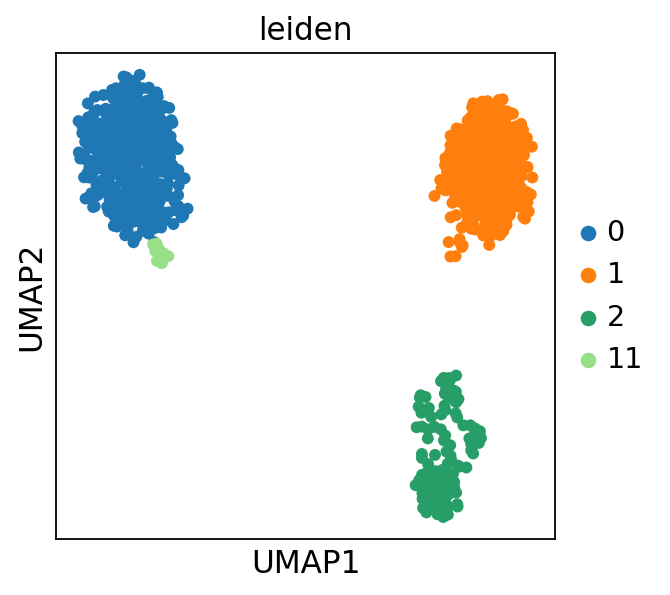

In [27]:
sc.pl.umap(subadata2, color = 'leiden')